In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [34]:
def clean_dates_in_csv(file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Assuming the column with dates is called 'date_column', adjust this as needed
    date_column = 'Date'  # Replace with your actual column name
    
    # Convert the date column to datetime format
    df[date_column] = df[date_column].astype(str).str[:8]
    
    # Extract the date in the format "m/d/y"
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce').dt.strftime('%m/%d/%Y')
    
    # Return or save the cleaned DataFrame
    return df

In [35]:
transactions = clean_dates_in_csv("transactions.csv")
transactions


C:\Users\thiquynh\AppData\Local\Temp\ipykernel_60796\3448050168.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce').dt.strftime('%m/%d/%Y')


,Date,Code,Value,Description
0,01/09/2020,5213.45946,50.000,292976.010924.013647.xin cam on
1,01/09/2020,5090.85797,20.000,VCB.CTDK.31/03/2024.ADIDA PHAT. CT tu 04810007...
2,01/09/2020,5241.83107,29.000,MBVCB.6916176124.CAO VIET TUAN chuyen tien.CT ...
3,01/09/2020,5218.87149,3.000,272986.010924.101858.DO DUC LOI chuyen tien
4,01/09/2020,5388.96713,3.000,020097040509011046122024JDC5013867.96713 .1046...
...,...,...,...,...
258841,12/09/2020,NaN,200000,Chuyen tien den tu NAPAS Noi dung: NGUYEN XUAN...
258842,12/09/2020,NaN,127600,CT nhanh 247 den: Ung ho dong bao thiet hai do...
258843,12/09/2020,NaN,400000,CT nhanh 247 den: Vietinbank;CT1111;Ung ho don...
258844,12/09/2020,NaN,500000,CT nhanh 247 den: MBVCB.7018038922.693816.Quyn...


In [37]:
transaction_frequency = transactions['Date'].value_counts().sort_index()
transaction_frequency

Date
01/09/2020        14
02/09/2020         5
03/09/2020         9
04/09/2020        42
05/09/2020        32
06/09/2020        34
07/09/2020        59
08/09/2020       503
09/09/2020      6279
10/09/2020    194864
11/09/2020     22845
12/09/2020     34160
Name: count, dtype: int64

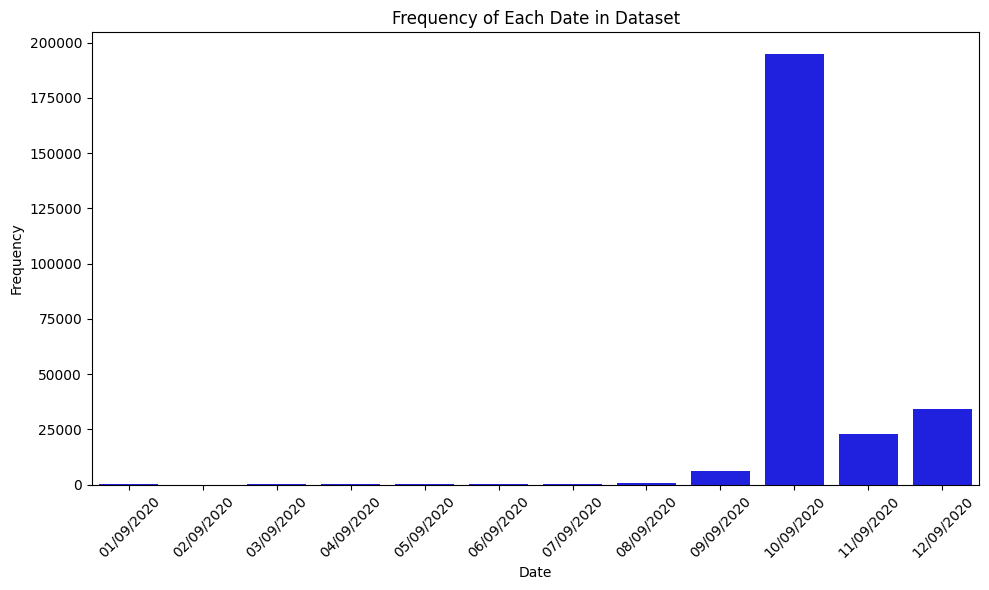

In [39]:
# Plot the frequency of dates
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_frequency.index, y=transaction_frequency.values, color="blue")

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Khoi luong giao dich tu 1/9 toi 12/9')
plt.xticks(rotation=45)  # Rotate the date labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
from datetime import datetime

with open('transactions.csv', 'r') as input_file:
    lines = input_file.readlines()
    for line in lines:
        line_date = datetime.strptime(line, '%B %d %y, %H:%M:%S.%f')

In [5]:
trending_topics = pd.read_csv("multiTimeline.csv")
trending_topics

,Category: All categories
Day,bão yagi: (Vietnam)
2024-09-01,<1
2024-09-02,1
2024-09-03,3
2024-09-04,10
2024-09-05,28
2024-09-06,84
2024-09-07,100
2024-09-08,24
2024-09-09,10


In [ ]:
google_trend_url = "https://trends.google.com/trends/explore?date=2024-09-01%202024-09-12&geo=VN&hl=en"

In [ ]:
https://trends.google.com/trends/api/widgetdata/relatedsearches?hl=en-US&tz=420&req=%7B%22restriction%22:%7B%22geo%22:%7B%22country%22:%22VN%22%7D,%22time%22:%222024-09-01+2024-09-12%22,%22originalTimeRangeForExploreUrl%22:%222024-09-01+2024-09-12%22%7D,%22keywordType%22:%22ENTITY%22,%22metric%22:%5B%22TOP%22,%22RISING%22%5D,%22trendinessSettings%22:%7B%22compareTime%22:%222024-08-20+2024-08-31%22%7D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D,%22language%22:%22en%22,%22userCountryCode%22:%22US%22,%22userConfig%22:%7B%22userType%22:%22USER_TYPE_LEGIT_USER%22%7D%7D&token=APP6_UEAAAAAZuXem5uP4nrERI9gHz6gbgOlhO-r2eR3

In [17]:
import httpx
import json
import pandas as pd

# Set the geographical location to the United States
geo_location = "VN"

# Add the API URLs
topics_url = "https://trends.google.com/trends/api/widgetdata/relatedsearches?hl=en-US&tz=420&req=%7B%22restriction%22:%7B%22geo%22:%7B%22country%22:%22VN%22%7D,%22time%22:%222024-09-01+2024-09-12%22,%22originalTimeRangeForExploreUrl%22:%222024-09-01+2024-09-12%22%7D,%22keywordType%22:%22QUERY%22,%22metric%22:%5B%22TOP%22,%22RISING%22%5D,%22trendinessSettings%22:%7B%22compareTime%22:%222024-08-20+2024-08-31%22%7D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D,%22language%22:%22en%22,%22userCountryCode%22:%22US%22,%22userConfig%22:%7B%22userType%22:%22USER_TYPE_LEGIT_USER%22%7D%7D&token=APP6_UEAAAAAZuXem2NU628aTX0oh1f1zFnLZYnZTPsb"

# Get the data from the API URLs
topics_response = httpx.get(url=topics_url)
# queries_response = httpx.get(url=queries_url)

# Remove the extra symbols and add the data into JSON objects
topics_data = json.loads(topics_response.text.replace(")]}',", ""))
# queries_data = json.loads(queries_response.text.replace(")]}',", ""))

result = []

# Prase the topics data and the data into the result list
for topic in topics_data["default"]["rankedList"][1]["rankedKeyword"]:
    topic_object = {
        "Title": topic["query"],
        "Search Volume": topic["value"],
        "Link": "https://trends.google.com" + topic["link"].replace("+","%20"),
        "Geo Location": geo_location,
        "Type": "search_topic",
    }
    result.append(topic_object)

hot_terms_df = pd.DataFrame(result)
hot_terms_df.to_csv("keywords.csv", index=False)

In [18]:
hot_terms = pd.read_csv("keywords.csv")
hot_terms

,Title,Search Volume,Link,Geo Location,Type
0,bão yagi,28200,https://trends.google.com/trends/explore?q=b%C...,VN,search_topic
1,cử tạ paralympics,11750,https://trends.google.com/trends/explore?q=c%E...,VN,search_topic
2,bão số 3,10350,https://trends.google.com/trends/explore?q=b%C...,VN,search_topic
3,quần vợt xe lăn paralympics,7000,https://trends.google.com/trends/explore?q=qu%...,VN,search_topic
4,cưỡi ngựa paralympics 2024,5950,https://trends.google.com/trends/explore?q=c%C...,VN,search_topic
5,cử tạ paralympics 2024,5850,https://trends.google.com/trends/explore?q=c%E...,VN,search_topic
6,môn quần vợt xe lăn tại thế vận hội dành cho n...,5350,https://trends.google.com/trends/explore?q=m%C...,VN,search_topic
7,thế vận hội dành cho người khuyết tật năm 2024,4050,https://trends.google.com/trends/explore?q=th%...,VN,search_topic
8,bão,3550,https://trends.google.com/trends/explore?q=b%C...,VN,search_topic
9,ngày quốc khánh việt nam,3300,https://trends.google.com/trends/explore?q=ng%...,VN,search_topic


C:\Users\thiquynh\AppData\Local\Temp\ipykernel_60796\1403726758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hot_terms['Title'], y=hot_terms['Search Volume'], palette='viridis')


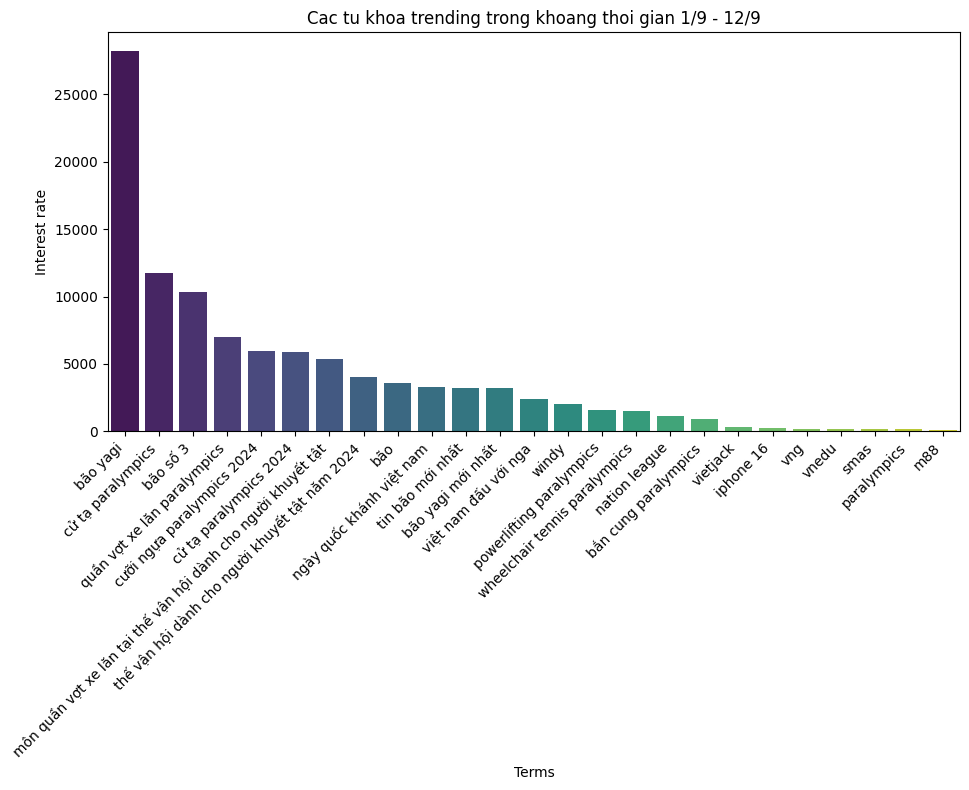

In [43]:
plt.figure(figsize=(10, 8))  # Increase the figure size
sns.barplot(x=hot_terms['Title'], y=hot_terms['Search Volume'], palette='viridis')

# Set labels and title
plt.xlabel('Terms')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Interest rate')
plt.title('Cac tu khoa trending trong khoang thoi gian 1/9 - 12/9')

# Show the plot
plt.tight_layout()
plt.show()

In [44]:
!pip install pytrends


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 57.3 MB/s eta 0:00:00


In [67]:
['2024-09-01 2024-09-12']*3

['2024-09-01 2024-09-12', '2024-09-01 2024-09-12', '2024-09-01 2024-09-12']

In [72]:
hot_terms['Title'].tolist()

['bão yagi',
 'cử tạ paralympics',
 'bão số 3',
 'quần vợt xe lăn paralympics',
 'cưỡi ngựa paralympics 2024',
 'cử tạ paralympics 2024',
 'môn quần vợt xe lăn tại thế vận hội dành cho người khuyết tật',
 'thế vận hội dành cho người khuyết tật năm 2024',
 'bão',
 'ngày quốc khánh việt nam',
 'tin bão mới nhất',
 'bão yagi mới nhất',
 'việt nam đấu với nga',
 'windy',
 'powerlifting paralympics',
 'wheelchair tennis paralympics',
 'nation league',
 'bắn cung paralympics',
 'vietjack',
 'iphone 16',
 'vng',
 'vnedu',
 'smas',
 'paralympics',
 'm88']

In [74]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=420) 
# build payload

kw_list = hot_terms['Title'].tolist() # list of keywords to get data 

pytrends.build_payload(kw_list, timeframe=['2024-09-01 2024-09-12'])


ResponseError: The request failed: Google returned a response with code 400

In [63]:
#1 Interest over Time
data = pytrends.interest_over_time() 
data = data.reset_index() 

In [64]:
data

,date,bão yagi,isPartial
0,2024-09-01,0,False
1,2024-09-02,1,False
2,2024-09-03,2,False
3,2024-09-04,9,False
4,2024-09-05,27,False
5,2024-09-06,79,False
6,2024-09-07,100,False
7,2024-09-08,24,False
8,2024-09-09,10,False
9,2024-09-10,7,False
